# Portfolio Optimiser
        - Anubhav Bajaj

Selected Stocks are:- Shree Cement, Bajaj Auto, IndusInd Bank, Eicher Motors, Maruti Suzuki , Titan

Risk Free return rate as - 0.07 or 7%
#### How did you choose the stocks?
Criteria for selection - No Corporate Actions like Bonus, Splits and Rights;

Criteria for optimising portfolio - No short selling

and Expected Return(we have taken CAGR as return) greater than 0 for each stock
#### What is the impact of increasing the number of stocks in the portfolio?
Adding stocks from 1->5 increases possible values of reward and risk ratio thereby giving more freedom to an investor 6-15 as number of stock is sweet region to minimize risk for max return and  15-24 more or less generalises portfolio as market portfolio and beyond is simply over generalisation and becomes inefficient portfolio. 
#### Why are calculating the weights by optimization and not giving equal weightage to every stock?
In order to minimise risk and maximise expected return and giving equal weightage isn't an affective way.
#### Which parameters are you using to check the accuracy of your model?
Sharpe Ratio, Treynor Ratio, Expected Return and Variance

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nsepy import get_history
from datetime import date
import math

## Importing Data

In [ ]:
stocks=['Shree Cement', 'Bajaj Auto', 'IndusInd Bank', 'Eicher Motors', 'Maruti Suzuki' , 'Titan']

In [ ]:
shree = get_history(symbol="SHREECEM", start=date(2015,4,1), end=date(2017,3,31))
bajajauto = get_history(symbol="BAJAJ-AUTO", start=date(2015,4,1), end=date(2017,3,31))
indusind = get_history(symbol="INDUSINDBK", start=date(2015,4,1), end=date(2017,3,31))
eicher = get_history(symbol="EICHERMOT", start=date(2015,4,1), end=date(2017,3,31))
maruti = get_history(symbol="MARUTI", start=date(2015,4,1), end=date(2017,3,31))
titan = get_history(symbol="TITAN", start=date(2015,4,1), end=date(2017,3,31))

In [ ]:
# Closing Data points
data=pd.DataFrame()
data['Shree Cement']=pd.Series(shree.Close)
data['Bajaj Auto']=pd.Series(bajajauto.Close)
data['IndusInd Bank']=pd.Series(indusind.Close)
data['Eicher Motors']=pd.Series(eicher.Close)
data['Maruti Suzuki']=pd.Series(maruti.Close)
data['Titan']=pd.Series(titan.Close)
data.head()

,Shree Cement,Bajaj Auto,IndusInd Bank,Eicher Motors,Maruti Suzuki,Titan
Date,,,,,,
2015-04-01,10878.20,2019.80,925.25,16019.50,3644.70,390.40
2015-04-06,10865.45,2036.40,914.95,15782.45,3628.95,403.60
2015-04-07,10954.95,2094.55,906.95,15983.30,3599.90,406.60
2015-04-08,10788.35,2099.50,901.95,16524.85,3628.70,407.45
2015-04-09,11091.90,2098.55,943.90,16302.50,3659.20,399.95


In [ ]:
# Daily returns as percentage
returns=pd.DataFrame()
returns['Shree Cement']=pd.Series(shree.Close.pct_change())
returns['Bajaj Auto']=pd.Series(bajajauto.Close.pct_change())
returns['IndusInd Bank']=pd.Series(indusind.Close.pct_change())
returns['Eicher Motors']=pd.Series(eicher.Close.pct_change())
returns['Maruti Suzuki']=pd.Series(maruti.Close.pct_change())
returns['Titan']=pd.Series(titan.Close.pct_change())
returns.head()

,Shree Cement,Bajaj Auto,IndusInd Bank,Eicher Motors,Maruti Suzuki,Titan
Date,,,,,,
2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-06,-0.001172,0.008219,-0.011132,-0.014798,-0.004321,0.033811
2015-04-07,0.008237,0.028555,-0.008744,0.012726,-0.008005,0.007433
2015-04-08,-0.015208,0.002363,-0.005513,0.033882,0.008000,0.002091
2015-04-09,0.028137,-0.000452,0.046510,-0.013455,0.008405,-0.018407


## WE will take CAGR as Expected Return

## Expected Return, Standard deviation, CoVariance matrix and Beta

In [ ]:
cagr=np.sqrt((data.loc['2017-03-31'])/data.loc['2015-04-01'])-1
cagr

Shree Cement     0.253159
Bajaj Auto       0.178547
IndusInd Bank    0.241083
Eicher Motors    0.263832
Maruti Suzuki    0.284731
Titan            0.088725
dtype: float64

In [ ]:
# covariance matrix
cov_matrix = returns.cov()
cov_matrix

,Shree Cement,Bajaj Auto,IndusInd Bank,Eicher Motors,Maruti Suzuki,Titan
Shree Cement,0.000418,0.000072,0.000100,0.000121,0.000072,0.000083
Bajaj Auto,0.000072,0.000251,0.000092,0.000119,0.000100,0.000055
IndusInd Bank,0.000100,0.000092,0.000237,0.000113,0.000118,0.000069
Eicher Motors,0.000121,0.000119,0.000113,0.000418,0.000122,0.000089
Maruti Suzuki,0.000072,0.000100,0.000118,0.000122,0.000264,0.000083
Titan,0.000083,0.000055,0.000069,0.000089,0.000083,0.000347


In [ ]:
return_stdev = returns.std()
annualised_stdev = return_stdev * np.sqrt(252)
annualised_stdev

Shree Cement     0.324711
Bajaj Auto       0.251288
IndusInd Bank    0.244496
Eicher Motors    0.324640
Maruti Suzuki    0.257868
Titan            0.295553
dtype: float64

In [ ]:
beta=pd.Series([1.25,0.98,2.07,0.98,1.39,0.91])
beta.index=['Shree Cement', 'Bajaj Auto', 'IndusInd Bank', 'Eicher Motors','Maruti Suzuki', 'Titan']
beta

Shree Cement     1.25
Bajaj Auto       0.98
IndusInd Bank    2.07
Eicher Motors    0.98
Maruti Suzuki    1.39
Titan            0.91
dtype: float64

## Creating Simulation of Various Portfolios

We will use Simulations to generate as many portfolio and then compare using variance, return, Treynor Ratio and Sharpe ratio

In [ ]:
#set number of runs of random portfolio weights
num_portfolios = 1000000
#set up array to hold results
results = np.zeros((10,num_portfolios))
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(6)
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(cagr * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    portfolio_beta = np.sum(weights*beta)
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = (results[0,i]-0.07)/ results[1,i]
    results[3,i] = (results[0,i]-0.07)/portfolio_beta
    for j in range(len(weights)):
        results[j+4,i] = weights[j]


In [ ]:
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['return','standard deviation','Sharpe Ratio','Treynor Ratio',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks[5]])
results_frame.head()

,return,standard deviation,Sharpe Ratio,Treynor Ratio,Shree Cement,Bajaj Auto,IndusInd Bank,Eicher Motors,Maruti Suzuki,Titan
0,0.207880,0.183089,0.753078,0.105852,0.000704,0.256873,0.242616,0.143729,0.172617,0.183460
1,0.205352,0.182543,0.741481,0.111305,0.142231,0.232304,0.162641,0.177785,0.083988,0.201050
2,0.246599,0.217009,0.813785,0.145784,0.329161,0.141567,0.110613,0.363473,0.053738,0.001447
3,0.217563,0.187496,0.787020,0.115135,0.295238,0.209679,0.180589,0.100347,0.083527,0.130620
4,0.248015,0.211962,0.839844,0.123940,0.364071,0.055353,0.318533,0.232174,0.026868,0.003001


## Portfolio with Maximum Sharpe Ratio

In [ ]:
max_sharpe_port = results_frame.iloc[results_frame['Sharpe Ratio'].idxmax()]
max_sharpe_port

return                0.263938
standard deviation    0.199759
Sharpe Ratio          0.970858
Treynor Ratio         0.133077
Shree Cement          0.195556
Bajaj Auto            0.004304
IndusInd Bank         0.239026
Eicher Motors         0.158637
Maruti Suzuki         0.400367
Titan                 0.002111
Name: 395416, dtype: float64

## Portfolio with Minimum Variance

In [ ]:
min_var_port = results_frame.iloc[results_frame['standard deviation'].idxmin()]
min_var_port

return                0.203461
standard deviation    0.177609
Sharpe Ratio          0.751430
Treynor Ratio         0.102111
Shree Cement          0.126608
Bajaj Auto            0.256266
IndusInd Bank         0.221333
Eicher Motors         0.032767
Maruti Suzuki         0.160400
Titan                 0.202627
Name: 887943, dtype: float64

## Portfolio with Maximum Return

In [ ]:
max_ret_port = pd.Series([0.284731,0.257868,0.832716,0.154482,1])
max_ret_port.index=['return', 'standard deviation', 'Sharpe Ratio','Treynor Ratio','Maruti Suzuki']
max_ret_port

return                0.284731
standard deviation    0.257868
Sharpe Ratio          0.832716
Treynor Ratio         0.154482
Maruti Suzuki         1.000000
dtype: float64

## Portfolio with Maximum Treynor Ratio

In [ ]:
max_treynor_port = results_frame.iloc[results_frame['Treynor Ratio'].idxmax()]
max_treynor_port

return                0.259428
standard deviation    0.266133
Sharpe Ratio          0.711781
Treynor Ratio         0.178224
Shree Cement          0.208242
Bajaj Auto            0.005243
IndusInd Bank         0.003546
Eicher Motors         0.708214
Maruti Suzuki         0.058349
Titan                 0.016406
Name: 524575, dtype: float64

## All Selected Portfolios

In [ ]:
portfolios=pd.DataFrame()
portfolios['Max Sharpe Ratio']=max_sharpe_port[4:]
portfolios['Min Variance']=min_var_port[4:]
portfolios['Max Return']=max_ret_port[4:]
portfolios['Max Return']=portfolios['Max Return'].fillna(0)
portfolios['Max Treynor Ratio']=max_treynor_port[4:]
portfolios

,Max Sharpe Ratio,Min Variance,Max Return,Max Treynor Ratio
Shree Cement,0.195556,0.126608,0.0,0.208242
Bajaj Auto,0.004304,0.256266,0.0,0.005243
IndusInd Bank,0.239026,0.221333,0.0,0.003546
Eicher Motors,0.158637,0.032767,0.0,0.708214
Maruti Suzuki,0.400367,0.160400,1.0,0.058349
Titan,0.002111,0.202627,0.0,0.016406


## Creating Markowitz Bullet and ploting selected Portfolios

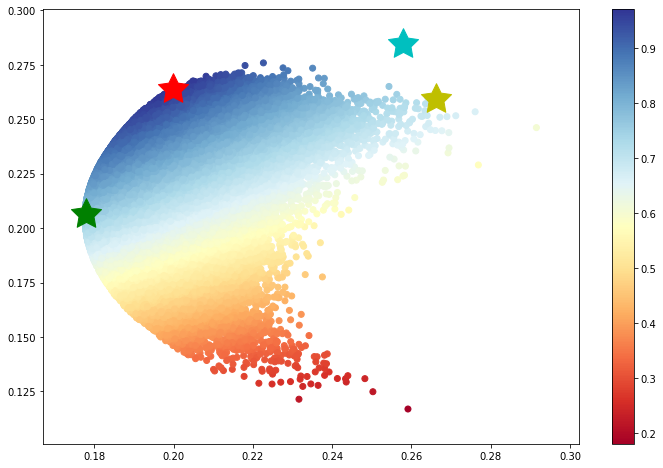

In [ ]:
#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(12,8))
plt.scatter(results_frame['standard deviation'],results_frame['return'],c=results_frame['Sharpe Ratio'],cmap='RdYlBu')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)
#plot yellow star to highlight position of portfolio with highest Treynor Ratio
plt.scatter(max_treynor_port[1],max_treynor_port[0],marker=(5,1,0),color='y',s=1000)
#plot cyan star to highlight position of portfolio with highest return portfolio
plt.scatter(max_ret_port[1],max_ret_port[0],marker=(5,1,0),color='c',s=1000)

## Testing Data

In [ ]:
shree1 = get_history(symbol="SHREECEM", start=date(2017,4,1), end=date(2018,3,31))
bajajauto1 = get_history(symbol="BAJAJ-AUTO", start=date(2017,4,1), end=date(2018,3,31))
indusind1 = get_history(symbol="INDUSINDBK", start=date(2017,4,1), end=date(2018,3,31))
eicher1 = get_history(symbol="EICHERMOT", start=date(2017,4,1), end=date(2018,3,31))
maruti1 = get_history(symbol="MARUTI", start=date(2017,4,1), end=date(2018,3,31))
titan1 = get_history(symbol="TITAN", start=date(2017,4,1), end=date(2018,3,31))

In [ ]:
# Closing Data points
data1=pd.DataFrame()
data1['Shree Cement']=pd.Series(shree1.Close)
data1['Bajaj Auto']=pd.Series(bajajauto1.Close)
data1['IndusInd Bank']=pd.Series(indusind1.Close)
data1['Eicher Motors']=pd.Series(eicher1.Close)
data1['Maruti Suzuki']=pd.Series(maruti1.Close)
data1['Titan']=pd.Series(titan1.Close)
data1.head()

,Shree Cement,Bajaj Auto,IndusInd Bank,Eicher Motors,Maruti Suzuki,Titan
Date,,,,,,
2017-04-03,17169.65,2783.60,1403.45,25543.65,6072.00,459.35
2017-04-05,17394.35,2760.85,1400.95,25765.25,6342.40,491.75
2017-04-06,17597.85,2806.30,1421.65,25596.30,6291.65,487.40
2017-04-07,17826.25,2830.45,1412.20,25806.85,6259.35,485.40
2017-04-10,17668.00,2837.00,1425.35,25578.25,6268.85,485.75


In [ ]:
# Daily returns as percentage
returns1=pd.DataFrame()
returns1['Shree Cement']=pd.Series(shree1.Close.pct_change())
returns1['Bajaj Auto']=pd.Series(bajajauto1.Close.pct_change())
returns1['IndusInd Bank']=pd.Series(indusind1.Close.pct_change())
returns1['Eicher Motors']=pd.Series(eicher1.Close.pct_change())
returns1['Maruti Suzuki']=pd.Series(maruti1.Close.pct_change())
returns1['Titan']=pd.Series(titan1.Close.pct_change())
returns1.head()

,Shree Cement,Bajaj Auto,IndusInd Bank,Eicher Motors,Maruti Suzuki,Titan
Date,,,,,,
2017-04-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-05,0.013087,-0.008173,-0.001781,0.008675,0.044532,0.070534
2017-04-06,0.011699,0.016462,0.014776,-0.006557,-0.008002,-0.008846
2017-04-07,0.012979,0.008606,-0.006647,0.008226,-0.005134,-0.004103
2017-04-10,-0.008877,0.002314,0.009312,-0.008858,0.001518,0.000721


In [ ]:
df=data1.reset_index()
df['Date']=df.Date.astype('datetime64[ns]')
df=df.set_index('Date')
data1=df.copy()

In [ ]:
df=returns1.reset_index()
df['Date']=df.Date.astype('datetime64[ns]')
df=df.set_index('Date')
returns1=df.copy()

## Calculating Expected Return, Standard Deviation and CoVariance of Testing data

In [ ]:
cagr1=np.sqrt((data1.loc['2018-03-28'])/data1.loc['2017-04-03'])-1
cagr1

Shree Cement    -0.028754
Bajaj Auto      -0.007012
IndusInd Bank    0.131476
Eicher Motors    0.053922
Maruti Suzuki    0.208031
Titan            0.432263
dtype: float64

In [ ]:
return_stdev1 = returns1.std()
annualised_stdev1 = return_stdev1 * np.sqrt(246)
annualised_stdev1

Shree Cement     0.253349
Bajaj Auto       0.188653
IndusInd Bank    0.184579
Eicher Motors    0.239245
Maruti Suzuki    0.184725
Titan            0.374362
dtype: float64

In [ ]:
cov_matrix1 = returns1.cov()
cov_matrix1

,Shree Cement,Bajaj Auto,IndusInd Bank,Eicher Motors,Maruti Suzuki,Titan
Shree Cement,0.000261,0.000041,0.000019,0.000070,0.000032,0.000059
Bajaj Auto,0.000041,0.000145,0.000033,0.000071,0.000056,0.000070
IndusInd Bank,0.000019,0.000033,0.000138,0.000038,0.000040,0.000013
Eicher Motors,0.000070,0.000071,0.000038,0.000233,0.000065,0.000064
Maruti Suzuki,0.000032,0.000056,0.000040,0.000065,0.000139,0.000065
Titan,0.000059,0.000070,0.000013,0.000064,0.000065,0.000570


## Using Above portfolios comparing  

### Expected Return

In [ ]:
er=np.dot(cagr1,portfolios)
er

array([0.11852784, 0.14638567, 0.20803061, 0.05185999])

Max Return Portfolio - Maruti Suzuki(1.0) performs best in this criteria

### Standard Deviation

In [ ]:
std=[]
for i in portfolios.columns:
    std.append(np.sqrt(np.dot(portfolios[i],(np.dot(cov_matrix1,portfolios[i].T))))* np.sqrt(246))
std

[0.1371237110432737,
 0.1433283341395982,
 0.1847246080257723,
 0.19739566100172118]

Max Sharpe Ratio portfolio of=

Shree Cement-0.195556, 
Bajaj Auto-0.004304,
IndusInd Bank-0.239026,
Eicher Motors-0.158637,
Maruti Suzuki-0.400367,
Titan-0.002111

Wins the race here

### Sharpe Ratio

In [ ]:
sr=(er-0.07)/std
sr

array([ 0.35389825,  0.53294187,  0.7472237 , -0.09189672])

Max Return Portfolio - Maruti Suzuki(1.0) performs best in this criteria

### Treynor Ratio

In [ ]:
portfolio_beta=np.dot(beta,portfolios)
tr=(er-0.07)/portfolio_beta
tr

array([ 0.03329891,  0.05844276,  0.09930259, -0.01706709])

Max Return Portfolio - Maruti Suzuki(1.0) again performs best here

Its interesting to see Maruti Suzuki has outperformed any other portfolio but Minimum risk is taken in consideration Max. Sharpe ratio portfolio performs well

### Which optimization techniques are used by Mutual Funds currently?
Mutual funds use techniques like Arbritrage Pricing Models and Stochastic programming for multistage portfolio optimization